In [1]:
import os
pth = os.path.abspath(os.path.join(os.getcwd(), '../..'))

                
import sys
sys.path.append(pth)
import src.commons as cmn
from src.exploration import OUNoise
from src.continuous_control.model import Actor, Critic
from src.buffer import MemoryER
from src.continuous_control.agent import DDPGAgent
from src.continuous_control.main import ContinuousControl, ddpg

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:

class Config:
    import os
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 33
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 512
    
    # Exploration parameter
    NOISE = True
    EPSILON_GREEDY = False
    EPSILON = 1
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    if (NOISE and EPSILON_GREEDY) or (not NOISE and not EPSILON_GREEDY):
        raise ValueError('Only one exploration policy either NOISE or EPSILON_GREEDY si to be chosen ..')
    
    # LEARNING PARAMETERS
    ACTOR_LEARNING_RATE = 0.0001
    CRITIC_LEARNING_RATE = 0.0005
    GAMMA = 0.99  # Discounts
    LEARNING_FREQUENCY = 4
    
    # WEIGHTS UPDATE PARAMENTER
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    SOFT_UPDATE_FREQUENCY = 4
    DECAY_TAU = False
    TAU_DECAY_RATE = 0.003
    TAU_MIN = 0.05
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 1000
    
    if (SOFT_UPDATE and HARD_UPDATE) or (not SOFT_UPDATE and not HARD_UPDATE):
        raise ValueError('Only one of Hard Update and Soft Update is to be chosen ..')
    
    if SOFT_UPDATE_FREQUENCY < LEARNING_FREQUENCY:
        raise ValueError('Soft update frequency can not be smaller than the learning frequency')
    
    # Lambda Functions:
    EXPLORATION_POLICY_FN = lambda: OUNoise(size=Config.ACTION_SIZE, seed=2)
    ACTOR_NETWORK_FN = lambda: Actor(Config.ACTION_SIZE, Config.STATE_SIZE, (512, 256), seed=2).to(
            device)  # lambda: Actor(Config.STATE_SIZE, Config.ACTION_SIZE, seed=2, fc1_units=512, fc2_units=256).to(
    # device)
    ACTOR_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.ACTOR_LEARNING_RATE)
    
    CRITIC_NETWORK_FN = lambda: Critic(Config.ACTION_SIZE, Config.STATE_SIZE, (512, 256), seed=2).to(
            device)  # lambda: Critic(Config.STATE_SIZE, Config.ACTION_SIZE, seed=2, fc1_units=512, fc2_units=256).to(
    # device)
    CRITIC_OPTIMIZER_FN = lambda params: torch.optim.Adam(params, lr=Config.CRITIC_LEARNING_RATE)
    
    MEMORY_FN = lambda: MemoryER(Config.BUFFER_SIZE, Config.BATCH_SIZE, seed=2, action_dtype='float')
    
    # USE PATH
    MODEL_NAME = 'model_1'
    model_dir =  pth + '/models'
    base_dir = os.path.join(model_dir, 'continuous_control', '%s' % (MODEL_NAME))
    if not os.path.exists(base_dir):
        print('creating .... ', base_dir)
        os.makedirs(base_dir)
    #
    STATS_JSON_PATH = os.path.join(base_dir, 'stats.json')
    CHECKPOINT_DIR = base_dir


# Run the DDPG Gra
# ddpg(
#         env=ContinuousControl(env_type='multi'),
#         agent = DDPGAgent(Config, None),
#         n_episodes=5000, max_t=2000
# )

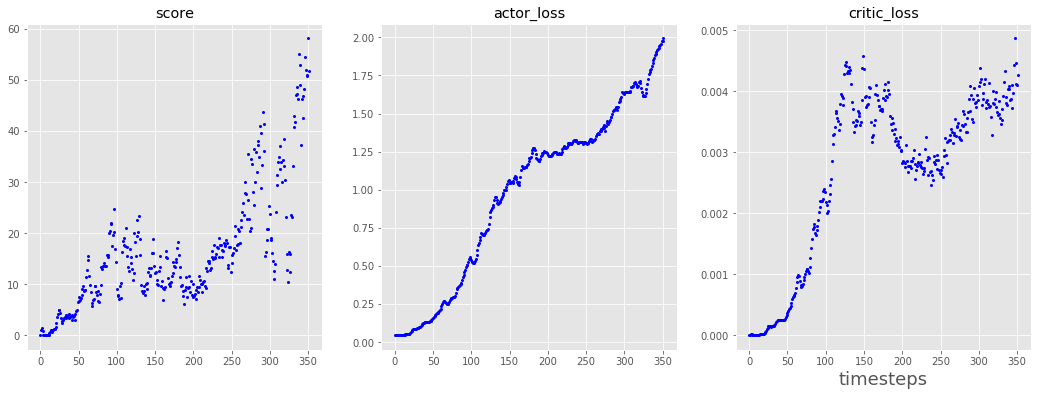

In [5]:
cmn.Plot()(Config.STATS_JSON_PATH, max_cols=3, exclude_plots=['rewards']).show()

## Plot Network Diagram:
-------

In [8]:
import torch
# input_size = (1,3,4,84,84)
actor_nn = Config.ACTOR_NETWORK_FN()
x = torch.rand(size=(20, 33))
y = actor_nn(x)
params = dict(actor_nn.named_parameters())

In [9]:
params

{'normalizer.weight': Parameter containing:
 tensor([ 0.6147,  0.3810,  0.6371,  0.4745,  0.7136,  0.6190,  0.4425,
          0.0958,  0.6142,  0.0573,  0.5657,  0.5332,  0.3901,  0.9088,
          0.5334,  0.7073,  0.7116,  0.2050,  0.3078,  0.9809,  0.0103,
          0.4660,  0.4604,  0.8547,  0.4525,  0.6317,  0.4760,  0.2200,
          0.2166,  0.2571,  0.0458,  0.1755,  0.6177]),
 'normalizer.bias': Parameter containing:
 tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'layers.0.weight': Parameter containing:
 tensor(1.00000e-02 *
        [[-3.2476,  0.3825, -0.7924,  ...,  3.0157, -0.8222, -3.6357],
         [ 0.4426,  1.3796,  0.8661,  ...,  1.4024,  1.2622,  2.1162],
         [ 3.5668, -2.3902, -2.7868,  ..., -1.3228,  4.3306, -4.2335],
         ...,
         [ 1.3552, -0.7747, -1.0900,  ...,  3.5869, -2.6680, -2.0710],
         [ 4.3

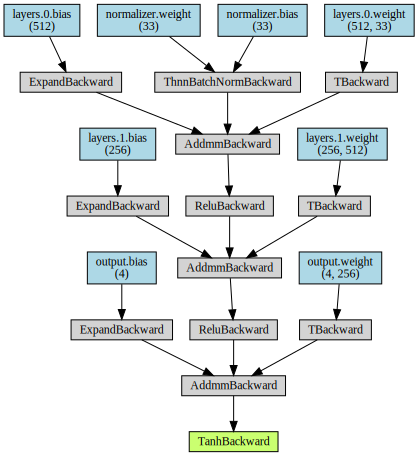

In [11]:
from IPython.core.display import display, HTML
from torchviz import make_dot
display(HTML("<style>.container { width:100% !important; }</style>"))

make_dot(y, params = params)

In [10]:
import torch
import numpy as np
# input_size = (1,3,4,84,84)
critic_nn = Config.CRITIC_NETWORK_FN()
x = torch.rand(size=(20, 33))
y = critic_nn(x, torch.randn(20,4))
params = dict(critic_nn.named_parameters())

torch.Size([20, 512])


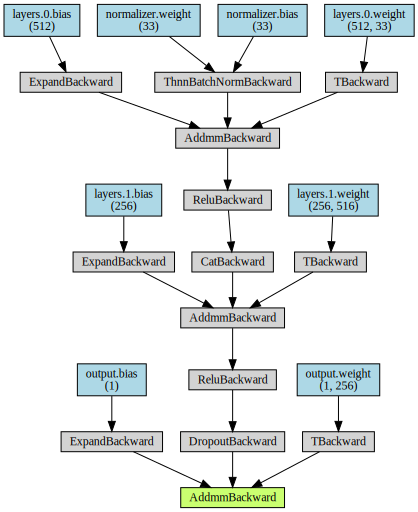

In [11]:
from IPython.core.display import display, HTML
from torchviz import make_dot
display(HTML("<style>.container { width:100% !important; }</style>"))

make_dot(y, params = params)